In [13]:
import pandas as pd
import Quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

df = Quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df(['label']))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.2)

clf = LinearRegression(n_jobs = -1)
clf.fit(X_train,y_train)
with open('linearregression.pickle','wb') as f:
    picle.dump(clf, f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle_in.load(pickle_in)
accuracy = clf.score(X_test,y_test)

print("accuracy = ",accuracy)

forecast_set = clf.predict(X_lately)

print(forecast_set,confidence,forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show

ImportError: No module named 'pandas'

r^2 = 0.7745302590288196


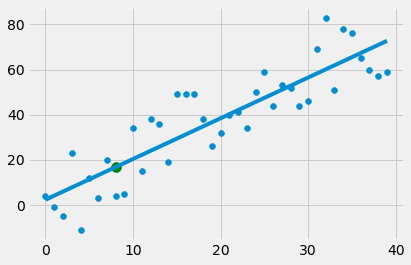

In [11]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,6] , dtype=np.float64)
ys = np.array([5,4,6,5,6,7] , dtype=np.float64)

def create_dataset(hm, variance, step = 2, correlation = False):
    val = 0
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+= step
        if correlation and correlation == 'neg':
            val-= step
    xs = [i for i in range(hm)]
    return np.array(xs, dtype = np.float64),np.array(ys,dtype=np.float64)
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
          ((mean(xs) * mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m,b

def sqaured_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    sqaured_error_regr = sqaured_error(ys_orig,ys_line)
    sqaured_error_y_mean = sqaured_error(ys_orig,y_mean_line)
    return 1 - (sqaured_error_regr/sqaured_error_y_mean)

xs, ys = create_dataset(40, 20, 2, correlation='pos')


m,b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = m*predict_x + b
r_squared = coefficient_of_determination(ys, regression_line)
print("r^2 =",r_squared)

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, s=100,color ='g')
plt.plot(xs,regression_line)
plt.show()